# EDA

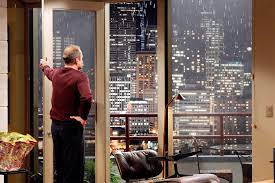

In [2]:
import warnings
# ignores warnings
warnings.filterwarnings("ignore")

# import all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
# import math to round up to the next number
import math
# used to plot maps
import folium
from folium import Marker
import folium.plugins as plugins
# used for analysis of missing values
import missingno as msno

plt.style.use('fivethirtyeight') 


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
# Choose the stakeholder, randomly as I can't decide
import random
person_number = random.randint(1,13)
person_number
# -> 1: Thomas Hansen	Buyer	5 kids, no money, wants nice (social) neighborhood, Timing?, Location?

12

## Getting an idea of the data

As a first step the data is being imported from the csv generated with a SQL query. Irrelevant columns, in this case the running index (id.1) and the id of the houses which are double (id.1 as it has less info in the column title compared to house_id) are being dropped.

In [4]:
#import the data from csv-file and show it to get a first impression
df = pd.read_csv('data/eda.csv')
# drop irrelevant columns or those with the same content. For now: id and id.1
df.drop(["id","id.1"], axis=1, inplace=True)
df.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0     3.000      1.000     1180.000  5650.000   1.000         NaN 0.000   
1     3.000      2.250     2570.000  7242.000   2.000       0.000 0.000   
2     2.000      1.000      770.000 10000.000   1.000       0.000 0.000   
3     4.000      3.000     1960.000  5000.000   1.000       0.000 0.000   
4     3.000      2.000     1680.000  8080.000   1.000       0.000 0.000   

   condition  grade  sqft_above  ...  yr_built  yr_renovated  zipcode    lat  \
0          3      7    1180.000  ...      1955         0.000    98178 47.511   
1          3      7    2170.000  ...      1951     19910.000    98125 47.721   
2          3      6     770.000  ...      1933           NaN    98028 47.738   
3          5      7    1050.000  ...      1965         0.000    98136 47.521   
4          3      8    1680.000  ...      1987         0.000    98074 47.617   

      long  sqft_living15  sqft_lot15        date      price    house_id  
0 -122.257       1340.000    5650.000  2014-10-13 221900.000  7129300520  
1 -122.319       1690.000    7639.000  2014-12-09 538000.000  6414100192  
2 -122.233       2720.000    8062.000  2015-02-25 180000.000  5631500400  
3 -122.393       1360.000    5000.000  2014-12-09 604000.000  2487200875  
4 -122.045       1800.000    7503.000  2015-02-18 510000.000  1954400510  

[5 rows x 21 columns]

Both the info as well as the describe command give a first rough overview of the data given. Some columns seem to have wrong data types, e.g. waterfront which is binary but the datatype is float64. These will be corrected later on.

In [5]:
# get an idea of the descriptive statistics as an overview
df.describe()

bedrooms  bathrooms  sqft_living    sqft_lot    floors  waterfront  \
count 21597.000  21597.000    21597.000   21597.000 21597.000   19206.000   
mean      3.373      2.116     2080.322   15099.409     1.494       0.008   
std       0.926      0.769      918.106   41412.637     0.540       0.087   
min       1.000      0.500      370.000     520.000     1.000       0.000   
25%       3.000      1.750     1430.000    5040.000     1.000       0.000   
50%       3.000      2.250     1910.000    7618.000     1.500       0.000   
75%       4.000      2.500     2550.000   10685.000     2.000       0.000   
max      33.000      8.000    13540.000 1651359.000     3.500       1.000   

           view  condition     grade  sqft_above  sqft_basement  yr_built  \
count 21534.000  21597.000 21597.000   21597.000      21145.000 21597.000   
mean      0.234      3.410     7.658    1788.597        291.857  1971.000   
std       0.766      0.651     1.173     827.760        442.491    29.375   
min       0.000      1.000     3.000     370.000          0.000  1900.000   
25%       0.000      3.000     7.000    1190.000          0.000  1951.000   
50%       0.000      3.000     7.000    1560.000          0.000  1975.000   
75%       0.000      4.000     8.000    2210.000        560.000  1997.000   
max       4.000      5.000    13.000    9410.000       4820.000  2015.000   

       yr_renovated   zipcode       lat      long  sqft_living15  sqft_lot15  \
count     17749.000 21597.000 21597.000 21597.000      21597.000   21597.000   
mean        836.651 98077.952    47.560  -122.214       1986.620   12758.284   
std        4000.111    53.513     0.139     0.141        685.230   27274.442   
min           0.000 98001.000    47.156  -122.519        399.000     651.000   
25%           0.000 98033.000    47.471  -122.328       1490.000    5100.000   
50%           0.000 98065.000    47.572  -122.231       1840.000    7620.000   
75%           0.000 98118.000    47.678  -122.125       2360.000   10083.000   
max       20150.000 98199.000    47.778  -121.315       6210.000  871200.000   

            price       house_id  
count   21597.000      21597.000  
mean   540296.574 4580474287.771  
std    367368.140 2876735715.748  
min     78000.000    1000102.000  
25%    322000.000 2123049175.000  
50%    450000.000 3904930410.000  
75%    645000.000 7308900490.000  
max   7700000.000 9900000190.000

Missing data is mostly prominent in the columns waterfront, view, sqft_basement and yr_renovated. An educated guess leads to the assumption that in case the house is not at a waterfront this column has been kept empty. The same seems to be valid for view, sqft_basement and yr_renovated. If there is no basement or the house hasn't been renovated so far it makes sense no value has been entered. 

In [6]:
df.isna().sum()

bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
house_id            0
dtype: int64

A few houses seem to show up several times. This might be due to the fact they have been sold more than once.

In [7]:
df["house_id"].duplicated().value_counts()

house_id
False    21420
True       177
Name: count, dtype: int64

What type of data is part of the data set? Are they continuous or categorical?

The following columns are categorical:
- nominal (no order): 
    - waterfront
    - zipcode
- ordinal (ordered):
    - floors
    - yr_built
    - yr_renovated

Whereas these are numerical:
- continuous (e.g. measurements):
    - sqft_living
    - sgft_lot
    - sqft_above
    - sqft_basement
    - lat
    - long
    - sqft_living_15
    - sqft_lot_15
    - price

- discrete (e.g. number of kids):
    - bedrooms
    - bathrooms
    - view
    - condition
    - grade 

In [8]:
# info on data types & how many nan values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21597 non-null  float64
 1   bathrooms      21597 non-null  float64
 2   sqft_living    21597 non-null  float64
 3   sqft_lot       21597 non-null  float64
 4   floors         21597 non-null  float64
 5   waterfront     19206 non-null  float64
 6   view           21534 non-null  float64
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  float64
 10  sqft_basement  21145 non-null  float64
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   17749 non-null  float64
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  float64
 17  sqft_lot15     21597 non-null  float64
 18  date  

Quite a few values seem to have the wrong data type, e.g. date, yr_renovated and the number of bedrooms. These will be corrected.

# Research questions & hypothesis

1. Which areas are nice social neighbourhoods? 
- Areas closer to the city centre are socially nicer as there are more houses than on the outskirts.
- Those with a lot of houses.

2. Where can I get a large house in a nice area that is cheap?
- large = min 5 bed rooms and 2 bath rooms
- cheap < 400,000 (this is what the client said)

3. If I get a cheap house does it mean it has to be renovated or is in a bad condition?
- yes

4. When are more houses being sold and does that lead to cheaper houses?
- Not in summer, as people are busy being on vacation.

# Exploring the data

In [36]:
# size of the data frame
initial_size = len(df)
print(initial_size)


21420


The living area alone is not a sufficient factor for Thomas Hansen to decide on a house as he has 5 kids and if always two live in a room and there is one bedroom for him and a living room, he needs a house with at least five rooms and two bath rooms to avoid stress.

bathrooms  0.500  0.750  1.000  1.250  1.500  1.750  2.000  2.250  2.500  \
bedrooms                                                                   
1.000          1     27    138      2     12      4      6      4      2   
2.000          2     26   1558      3    294    304    216    118    197   
3.000          0     16   1780      4    829   1870   1048   1082   2357   
4.000          1      2    325      0    254    719    525    709   2502   
5.000          0      0     43      0     48    134    110    116    287   
6.000          0      0      6      0      6     16     24     15     29   
7.000          0      0      1      0      2      0      0      3      2   
8.000          0      0      0      0      0      0      0      0      1   
9.000          0      0      0      0      0      0      0      0      0   
10.000         0      0      0      0      0      0      1      0      0   
11.000         0      0      0      0      0      0      0      0      0   
33.000         0      0      0      0      0      1      0      0      0   

bathrooms  2.750  ...  5.250  5.500  5.750  6.000  6.250  6.500  6.750  7.500  \
bedrooms          ...                                                           
1.000          0  ...      0      0      0      0      0      0      0      0   
2.000         20  ...      0      0      0      0      0      0      0      0   
3.000        275  ...      0      0      0      0      0      0      0      0   
4.000        639  ...      5      5      1      0      0      0      0      0   
5.000        214  ...      4      4      2      4      2      1      1      0   
6.000         31  ...      3      0      0      1      0      1      0      0   
7.000          3  ...      0      1      1      0      0      0      1      0   
8.000          3  ...      0      0      0      1      0      0      0      0   
9.000          0  ...      0      0      0      0      0      0      0      1   
10.000         0  ...      1      0      0      0      0      0      0      0   
11.000         0  ...      0      0      0      0      0      0      0      0   
33.000         0  ...      0      0      0      0      0      0      0      0   

bathrooms  7.750  8.000  
bedrooms                 
1.000          0      0  
2.000          0      0  
3.000          0      0  
4.000          0      0  
5.000          0      0  
6.000          1      1  
7.000          0      1  
8.000          0      0  
9.000          0      0  
10.000         0      0  
11.000         0      0  
33.000         0      0  

[12 rows x 29 columns]

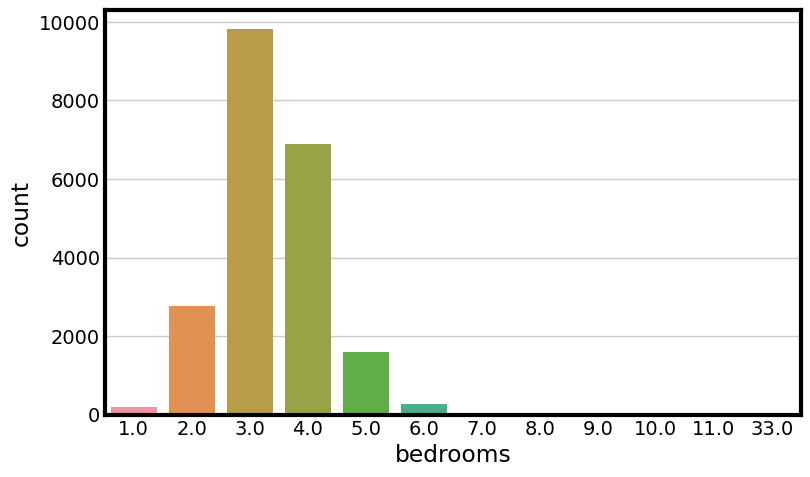

In [13]:
sns.countplot(data=df, x="bedrooms")
pd.crosstab(df["bedrooms"], df["bathrooms"])

As it can be seen in the count plot above most of the houses have either three or four bed rooms. So the vast majority of the houses is already no buying option for our client. As per the crosstab it seems there are also not a lot of houses that have min 5 bedrooms and 2 bathrooms. It might be that Thomas has to reconsider his conditions. 

In [14]:
# Plotting all houses   

# Define a map, centered at the Snoqualmie which is roughly the center of King County 
map = folium.Map(location=[47.5048, -121.8919], tiles='Stamen Terrain', zoom_start=10)

#combining latitude and longitude for plotting it
locations = list(zip(df["lat"],df["long"]))
#for i in range(len(locations)):
#    folium.CircleMarker(location=locations[i],radius=1).add_to(map)

plugins.MarkerCluster(locations).add_to(map)

# adds a map of the larger area in the bottom right corner
minimap = plugins.MiniMap()
map.add_child(minimap)

# Show the map
map
#export the map
#map.save("map_all_houses.html")


The above map gives already a good idea where houses are distributed. As a first approach these houses will be filtered as per Thomas Hansen's requirements.

# Data Cleaning

As a first step in the cleaning process, double entries which have been detected earlier, meaning houses that have been sold or bought several times, are deleted. For our client and in this analysis this info is not important. After that all columns that are of no interest are being removed. 
- the house_id
- sqft_living15
- sqft_lot15
- the year when the house was built
- sqtf_above as only the total area is relevant for Thomas
- sqft_basement


In [16]:
print(f"The initial size of the dataframe is {df.shape}.")

The initial size of the dataframe is (21597, 21).


In [17]:
# removing duplicates
df.drop_duplicates(subset=["house_id"], inplace=True)
#df["house_id"].value_counts()
df.drop(["sqft_living15", "sqft_lot15", "yr_built", "house_id"], axis= 1, inplace=True)
df.drop(["sqft_above", "sqft_basement"], axis=1, inplace=True)


In [18]:
df.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0     3.000      1.000     1180.000  5650.000   1.000         NaN 0.000   
1     3.000      2.250     2570.000  7242.000   2.000       0.000 0.000   
2     2.000      1.000      770.000 10000.000   1.000       0.000 0.000   
3     4.000      3.000     1960.000  5000.000   1.000       0.000 0.000   
4     3.000      2.000     1680.000  8080.000   1.000       0.000 0.000   

   condition  grade  yr_renovated  zipcode    lat     long        date  \
0          3      7         0.000    98178 47.511 -122.257  2014-10-13   
1          3      7     19910.000    98125 47.721 -122.319  2014-12-09   
2          3      6           NaN    98028 47.738 -122.233  2015-02-25   
3          5      7         0.000    98136 47.521 -122.393  2014-12-09   
4          3      8         0.000    98074 47.617 -122.045  2015-02-18   

       price  
0 221900.000  
1 538000.000  
2 180000.000  
3 604000.000  
4 510000.000

As a reminder the missing data is mostly found in the waterfront, view and year renovated. The matrix overview gives us an idea that there is no connection between missing values. Missing data in both the view and waterfront category will be treated as "0" meaning there is not a good view and the houses are not at the waterfront. The houses with a zero entry will be kept suggesting that these houses have not been renovated, missing entries will also be set to zero to indicate that these houses have not been renovated either.

In [19]:
# printing entries with nan as a value
df.isna().sum()

bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront      2360
view              63
condition          0
grade              0
yr_renovated    3811
zipcode            0
lat                0
long               0
date               0
price              0
dtype: int64

In [20]:
# showing missing entries to get an idea whether there is a connection between them
msno.matrix(df)

<Axes: >

In [21]:
# setting values for missing data
df.fillna({"waterfront":0, "view":0, "yr_renovated":0}, inplace=True)

A quick check whether the missing entries are taken care of.

In [22]:
df.isna().sum()

bedrooms        0
bathrooms       0
sqft_living     0
sqft_lot        0
floors          0
waterfront      0
view            0
condition       0
grade           0
yr_renovated    0
zipcode         0
lat             0
long            0
date            0
price           0
dtype: int64

The initial inspection of the data showed there are still some columns with wrong categories. These will now be changed to the correct ones. The number of floors is changed to an integer, as well as the bedrooms and the view which ranges from 0 to 4 in whole numbers and the year of the renovation. The date of sale is being changed to a time format.

In [25]:
# assigning correct data types to some columns
df = df.astype({"bedrooms":int})
df = df.astype({"floors":int})
df = df.astype({"waterfront":bool})
df = df.astype({"view":int})
df = df.astype({"yr_renovated":int})
# converting the date into datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
# check whether the data types are correct
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21420 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   bedrooms      21420 non-null  int64         
 1   bathrooms     21420 non-null  float64       
 2   sqft_living   21420 non-null  float64       
 3   sqft_lot      21420 non-null  float64       
 4   floors        21420 non-null  int64         
 5   waterfront    21420 non-null  bool          
 6   view          21420 non-null  int64         
 7   condition     21420 non-null  int64         
 8   grade         21420 non-null  int64         
 9   yr_renovated  21420 non-null  int64         
 10  zipcode       21420 non-null  int64         
 11  lat           21420 non-null  float64       
 12  long          21420 non-null  float64       
 13  date          21420 non-null  datetime64[ns]
 14  price         21420 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(6)

Once all data has been transformed, data points that fall not in Thomas range (bedrooms less than five, bathrooms less than two and a price above 400,000 USD) will be removed.

Nice Neighbourhoods

Montlake 98112
Madrona & Leschi 98122, 98144
Beacon Hill 98108, 98188
West Seattle 98116
North Queen Anne 98109, 98119
Wallingford & Greenlake 98103, 98115
Capitol Hill 98102
Ballard & Fremont 98117, 98107
Mount Baker & Columbia City 98144, 98118

In [26]:
nice_zips = [98112, 98122, 98108, 98118, 98144, 98116, 98109, 98119, 98103, 98115, 98102, 98117, 98107, 98052, 98008, 98004, 98005, 98006, 98007, 98009, 98015, 98027, 98039, 98040, 98074]
# as per https://bungalow.com/articles/best-neighborhoods-in-seattle-wa and https://www.niche.com/places-to-live/search/best-places-to-live/c/king-county-wa/ top 9 and top 10
df_cleaned = df.query("bedrooms >= 5 and bathrooms >= 2 and price <= 400000").reset_index()
df_cleaned = df_cleaned.query("zipcode in [98112, 98122, 98108, 98118, 98144, 98116, 98109, 98119, 98103, 98115, 98102, 98117, 98107, 98052, 98008, 98004, 98005, 98006, 98007, 98009, 98015, 98027, 98039, 98040, 98074]")
df_cleaned.shape

(39, 16)

In [27]:
# Plotting houses that are only once in the data set, have a price below 400000 USD and at least five bedrooms and 2 bedrooms

# Define a map, centered at Mercer Island, centre of data points left
map = folium.Map(location=[47.5582, -122.2184], tiles='Stamen Terrain', zoom_start=12)

#combining latitude and longitude for plotting it
locations = list(zip(df_cleaned["lat"],df_cleaned["long"]))


plugins.MarkerCluster(locations).add_to(map)

# adds a map of the larger area in the bottom right corner
minimap = plugins.MiniMap()
map.add_child(minimap)

# Show the map
map
#map.save("map_hansen.html")


In [28]:
# showing the zip codes that are left over after data cleaning.
df_cleaned["zipcode"]
interesting_zips = []
for i in df_cleaned["zipcode"]:
    if i not in interesting_zips:
        interesting_zips.append(i)

interesting_zips

[98144, 98118, 98116, 98027, 98108, 98008, 98122]

A nice house which is relatively cheap can be found in the following nice areas [98144, 98118, 98116, 98027, 98108, 98008, 98122] which are Mount Baker, Leschi, Madrona, Beacon Hill and West Seattle in Seattle and Issaqua and Bellevue on the outskirts. Thomas has the choice between quite a few houses closer to the city and only three places on the outskirts.

In [29]:
# descriptive statistics on houses left
df_cleaned.describe()

index  bedrooms  bathrooms  sqft_living  sqft_lot  floors   view  \
count    39.000    39.000     39.000       39.000    39.000  39.000 39.000   
mean  10119.051     5.205      2.673     2219.487  6244.974   1.205  0.128   
min     176.000     5.000      2.000     1430.000  2400.000   1.000  0.000   
25%    4273.000     5.000      2.000     1975.000  5000.000   1.000  0.000   
50%    9087.000     5.000      2.750     2130.000  5600.000   1.000  0.000   
75%   15690.000     5.000      3.000     2420.000  7020.000   1.000  0.000   
max   21253.000     6.000      4.500     3390.000 25175.000   2.000  3.000   
std    6628.454     0.409      0.626      426.232  3494.326   0.409  0.570   

       condition  grade  yr_renovated   zipcode    lat     long  \
count     39.000 39.000        39.000    39.000 39.000   39.000   
mean       3.308  7.026      1026.923 98110.872 47.548 -122.278   
min        3.000  5.000         0.000 98008.000 47.497 -122.394   
25%        3.000  7.000         0.000 98108.000 47.529 -122.300   
50%        3.000  7.000         0.000 98118.000 47.546 -122.287   
75%        3.500  7.000         0.000 98118.000 47.559 -122.274   
max        5.000  9.000     20050.000 98144.000 47.609 -122.036   
std        0.569  0.628      4474.707    28.242  0.027    0.064   

                                date      price  
count                             39     39.000  
mean   2014-10-19 09:50:46.153846272 338455.564  
min              2014-05-06 00:00:00 133000.000  
25%              2014-07-13 00:00:00 318000.000  
50%              2014-10-10 00:00:00 352000.000  
75%              2015-01-18 00:00:00 380000.000  
max              2015-04-20 00:00:00 400000.000  
std                              NaN  59699.424

Another look at the descriptive statistics shows there are no real outliers left over. This is mostly due to the fact that the price Thomas can pay has already removed those extreme outliers.

In [30]:
current_size = len(df_cleaned)
print(f"The initial count of data points is {initial_size}, whereas the current is {current_size}.")

The initial count of data points is 21597, whereas the current is 39.


In [31]:
# adding month as a column
df_cleaned['month'] = df_cleaned["date"].dt.month

index  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
5     176         5      2.750     1970.000  5400.000       1       False   
13   1140         5      2.000     1680.000  3240.000       1       False   
23   1665         5      2.000     1880.000  4179.000       1       False   
26   1870         5      3.000     2080.000  6150.000       1       False   
28   1930         5      3.000     1980.000  3868.000       1       False   

    view  condition  grade  yr_renovated  zipcode    lat     long       date  \
5      0          3      7             0    98144 47.587 -122.308 2014-07-09   
13     0          3      5             0    98144 47.596 -122.311 2015-02-24   
23     0          3      7         20000    98118 47.554 -122.283 2015-01-08   
26     0          3      7             0    98116 47.571 -122.394 2014-07-30   
28     0          3      7             0    98118 47.517 -122.275 2014-09-02   

        price  month  year  season  
5  399950.000      7  2014  summer  
13 380000.000      2  2015  winter  
23 349950.000      1  2015  winter  
26 345000.000      7  2014  summer  
28 333800.000      9  2014    fall

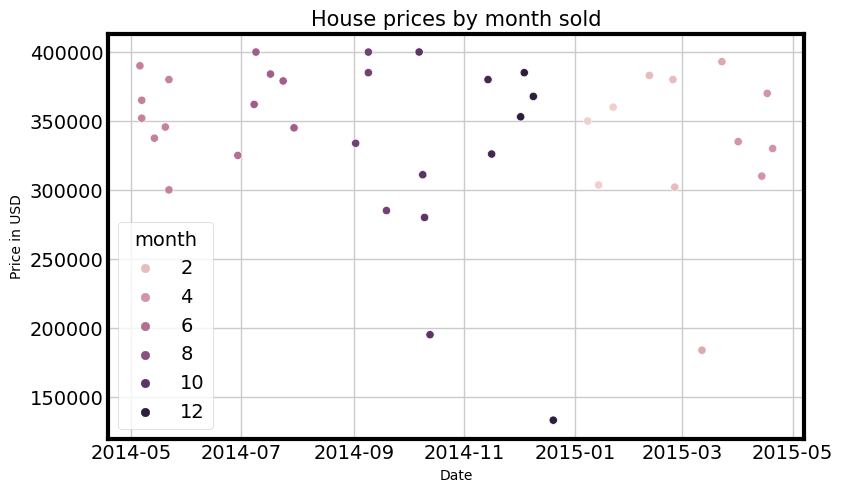

In [32]:
# assigning months to seasons
df_cleaned['season'] = df_cleaned['month'].map({
    1: 'winter',
    2: 'winter',
    3: 'spring',
    4: 'spring',
    5: 'spring',
    6: 'summer', 
    7: 'summer',
    8: 'summer',
    9: 'fall',
    10: 'fall',
    11: 'fall',
    12: 'winter'
    })


# plotting the houses by price, filtered for the seasons
season = sns.scatterplot(data=df_cleaned,x="date", y= "price", hue ="month")
season.set_ylabel("Price in USD", fontsize = 10)
season.set_xlabel("Date", fontsize = 10)
season.set_title("House prices by month sold", fontsize = 15)


In [33]:
# analysis of houses by seasons
df_seasonality = df_cleaned.groupby("season").describe()["price"]
df_seasonality

count       mean        min        25%        50%        75%  \
season                                                                 
fall   10.000 329574.000 194990.000 291500.000 329900.000 383750.000   
spring 13.000 337834.615 183750.000 330000.000 345600.000 370000.000   
summer  6.000 365825.000 325000.000 349250.000 370500.000 382750.000   
winter 10.000 331722.700 133000.000 315112.500 356500.000 376944.250   

              max       std  
season                       
fall   400000.000 65371.016  
spring 393000.000 54462.309  
summer 399950.000 27507.885  
winter 385000.000 75904.675

The houses have been filtered by season and plotted. There are some outliers and a relatively wide range of data points for all seasons. As the number of data points is already low and all seasons have outliers which indicate the cheap houses. These will be kept. The average price of houses is lowest in fall. Whereas the cheapest house has been sold in winter. Summer does not seem to be the best season to buy a house as the average is the highest.

The next question/hypothesis is whether a cheap house means it is in need of renovation and/or in a bad condition. If there is no renovation date, the house has not been renovated. The relevant categories are yr_renovated and the condition which ranges from 0 to 5. In the initial hypothesis I assumed that a cheap house is in a bad condition. Just using a simple countplot suggests the opposite. All houses that are of interest for Thomas Hansen are at least of a average condition of 3 or more. So this suggests the opposite. 

In [34]:
# plotting houses grouped by their condition
conditions = sns.countplot(data=df_cleaned, x="condition")
conditions.set_ylabel("Number of houses", fontsize = 10)
conditions.set_xlabel("Condition [range 0 to 5]", fontsize = 10)
conditions.set_title("Number of houses by condition", fontsize = 15)

Text(0.5, 1.0, 'Number of houses by condition')

In [35]:
# calculating how many houses are not renovated
unrenovated_houses = df_cleaned.query("yr_renovated == 0")
unrenovated_houses.count()

index           37
bedrooms        37
bathrooms       37
sqft_living     37
sqft_lot        37
floors          37
waterfront      37
view            37
condition       37
grade           37
yr_renovated    37
zipcode         37
lat             37
long            37
date            37
price           37
month           37
year            37
season          37
dtype: int64

Apparently almost all except for two houses have not been renovated. So even though the houses are not in bad conditions at one point Thomas Hansen might have to renovate his new house.